In [10]:
import numpy as np
import random
from new_src.solver import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_j_values(j_vector_list : list) -> None:
    plt.figure(figsize=(7,5), dpi=100)
    j_vector_list_mev = [i * 1000 for i in j_vector_list]
    for y in j_vector_list_mev:
        x = range(1, len(y) + 1)
        plt.plot(x, y)
        plt.scatter(x, y, label=len(x))
    plt.xlabel('Coordination sphere number', fontsize = 14)
    plt.ylabel('J, meV', fontsize = 14)
    plt.xticks(range(1, len(j_vector_list[-1]) + 1))
    plt.grid(alpha=.4)
    plt.legend()
    plt.show()

In [3]:
input_path = 'examples/Fe/'
magnetic_atom = 'Fe'
spin = 2

In [4]:
nn_matrix, sorted_matrix, good_struct_list, bad_struct_list = sorted_matrix_getter(input_path, magnetic_atom, spin)

num_of_variables = sorted_matrix.shape[0]
energies = sorted_matrix[...,-1]
matrix = sorted_matrix[...,:-1]

results = []
for i in range(2, num_of_variables + 1):
    tmp_matrix = matrix[...,:i]
    x_lstsq = np.linalg.lstsq(tmp_matrix, energies)[0]
    results.append(x_lstsq)

E_geom, j_vector_list = j_vector_list_getter(sorted_matrix)

100%|██████████| 7/7 [00:15<00:00,  2.18s/it]


In [5]:
E_geom_list = np.array([i[0] for i in results])
j_vectors_list = [abs(i[1:]) for i in results]

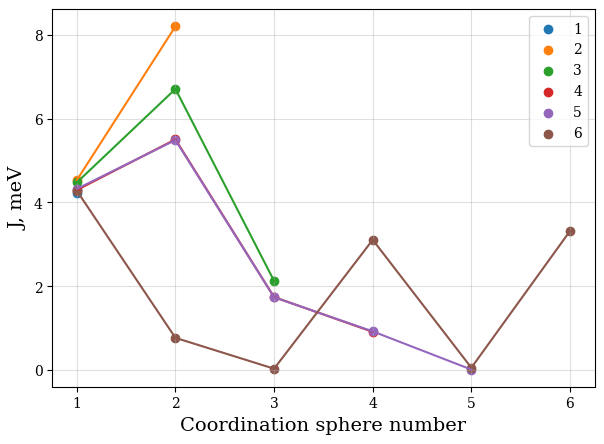

In [6]:
plot_j_values(j_vectors_list)

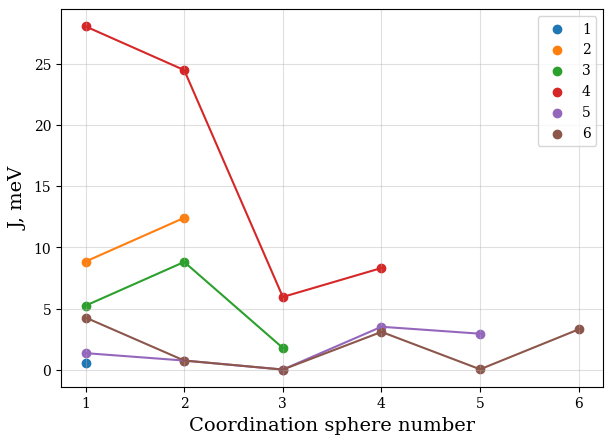

In [7]:
plot_j_values(j_vector_list)

In [8]:
z_vector = get_nn_list(path_to_poscar=os.path.join(input_path, 'POSCAR'),
                           magnetic_atom=magnetic_atom)
Tc_list = Tc_list_getter(j_vectors_list, z_vector)

In [9]:
for i in Tc_list:
    print(i, 'K')

130.8 K
330.5 K
360.1 K
357.1 K
359.4 K
378.3 K


In [10]:
Tc_list_2 = Tc_list_getter(j_vector_list, z_vector)

In [11]:
for i in Tc_list_2:
    print(i, 'K')

print(Tc_list_2.mean())

17.7 K
562.1 K
422.9 K
2006.8 K
500.5 K
378.3 K
648.0500000000001


In [12]:
E_fitted_list = []
for x in results:
    shape_tmp = x.shape[0]
    tmp_matrix = matrix[...,:shape_tmp]
    E_fitted = tmp_matrix@x
    E_fitted_list.append(E_fitted)

In [18]:
def plot_fitting_energies(E_fit, E_dft):
    full_list = np.append(E_fit, E_dft)
    E_min = min(full_list)
    E_max = max(full_list)
    plt.xlim(E_min + 0.001 * E_min, E_max - 0.001 * E_min)
    plt.ylim(E_min + 0.001 * E_min, E_max - 0.001 * E_min)
    plt.grid(alpha=.4)
    l_space = np.linspace(E_min + 0.01 * E_min, E_max - 0.01 * E_min)
    plt.plot(l_space, l_space, ls='--', color='r')
    plt.scatter(E_fit, E_dft, color='g')
    plt.xlabel(r'$E^{fit}, eV$', fontsize=16)
    plt.ylabel(r'$E^{DFT}, eV$', fontsize=16)

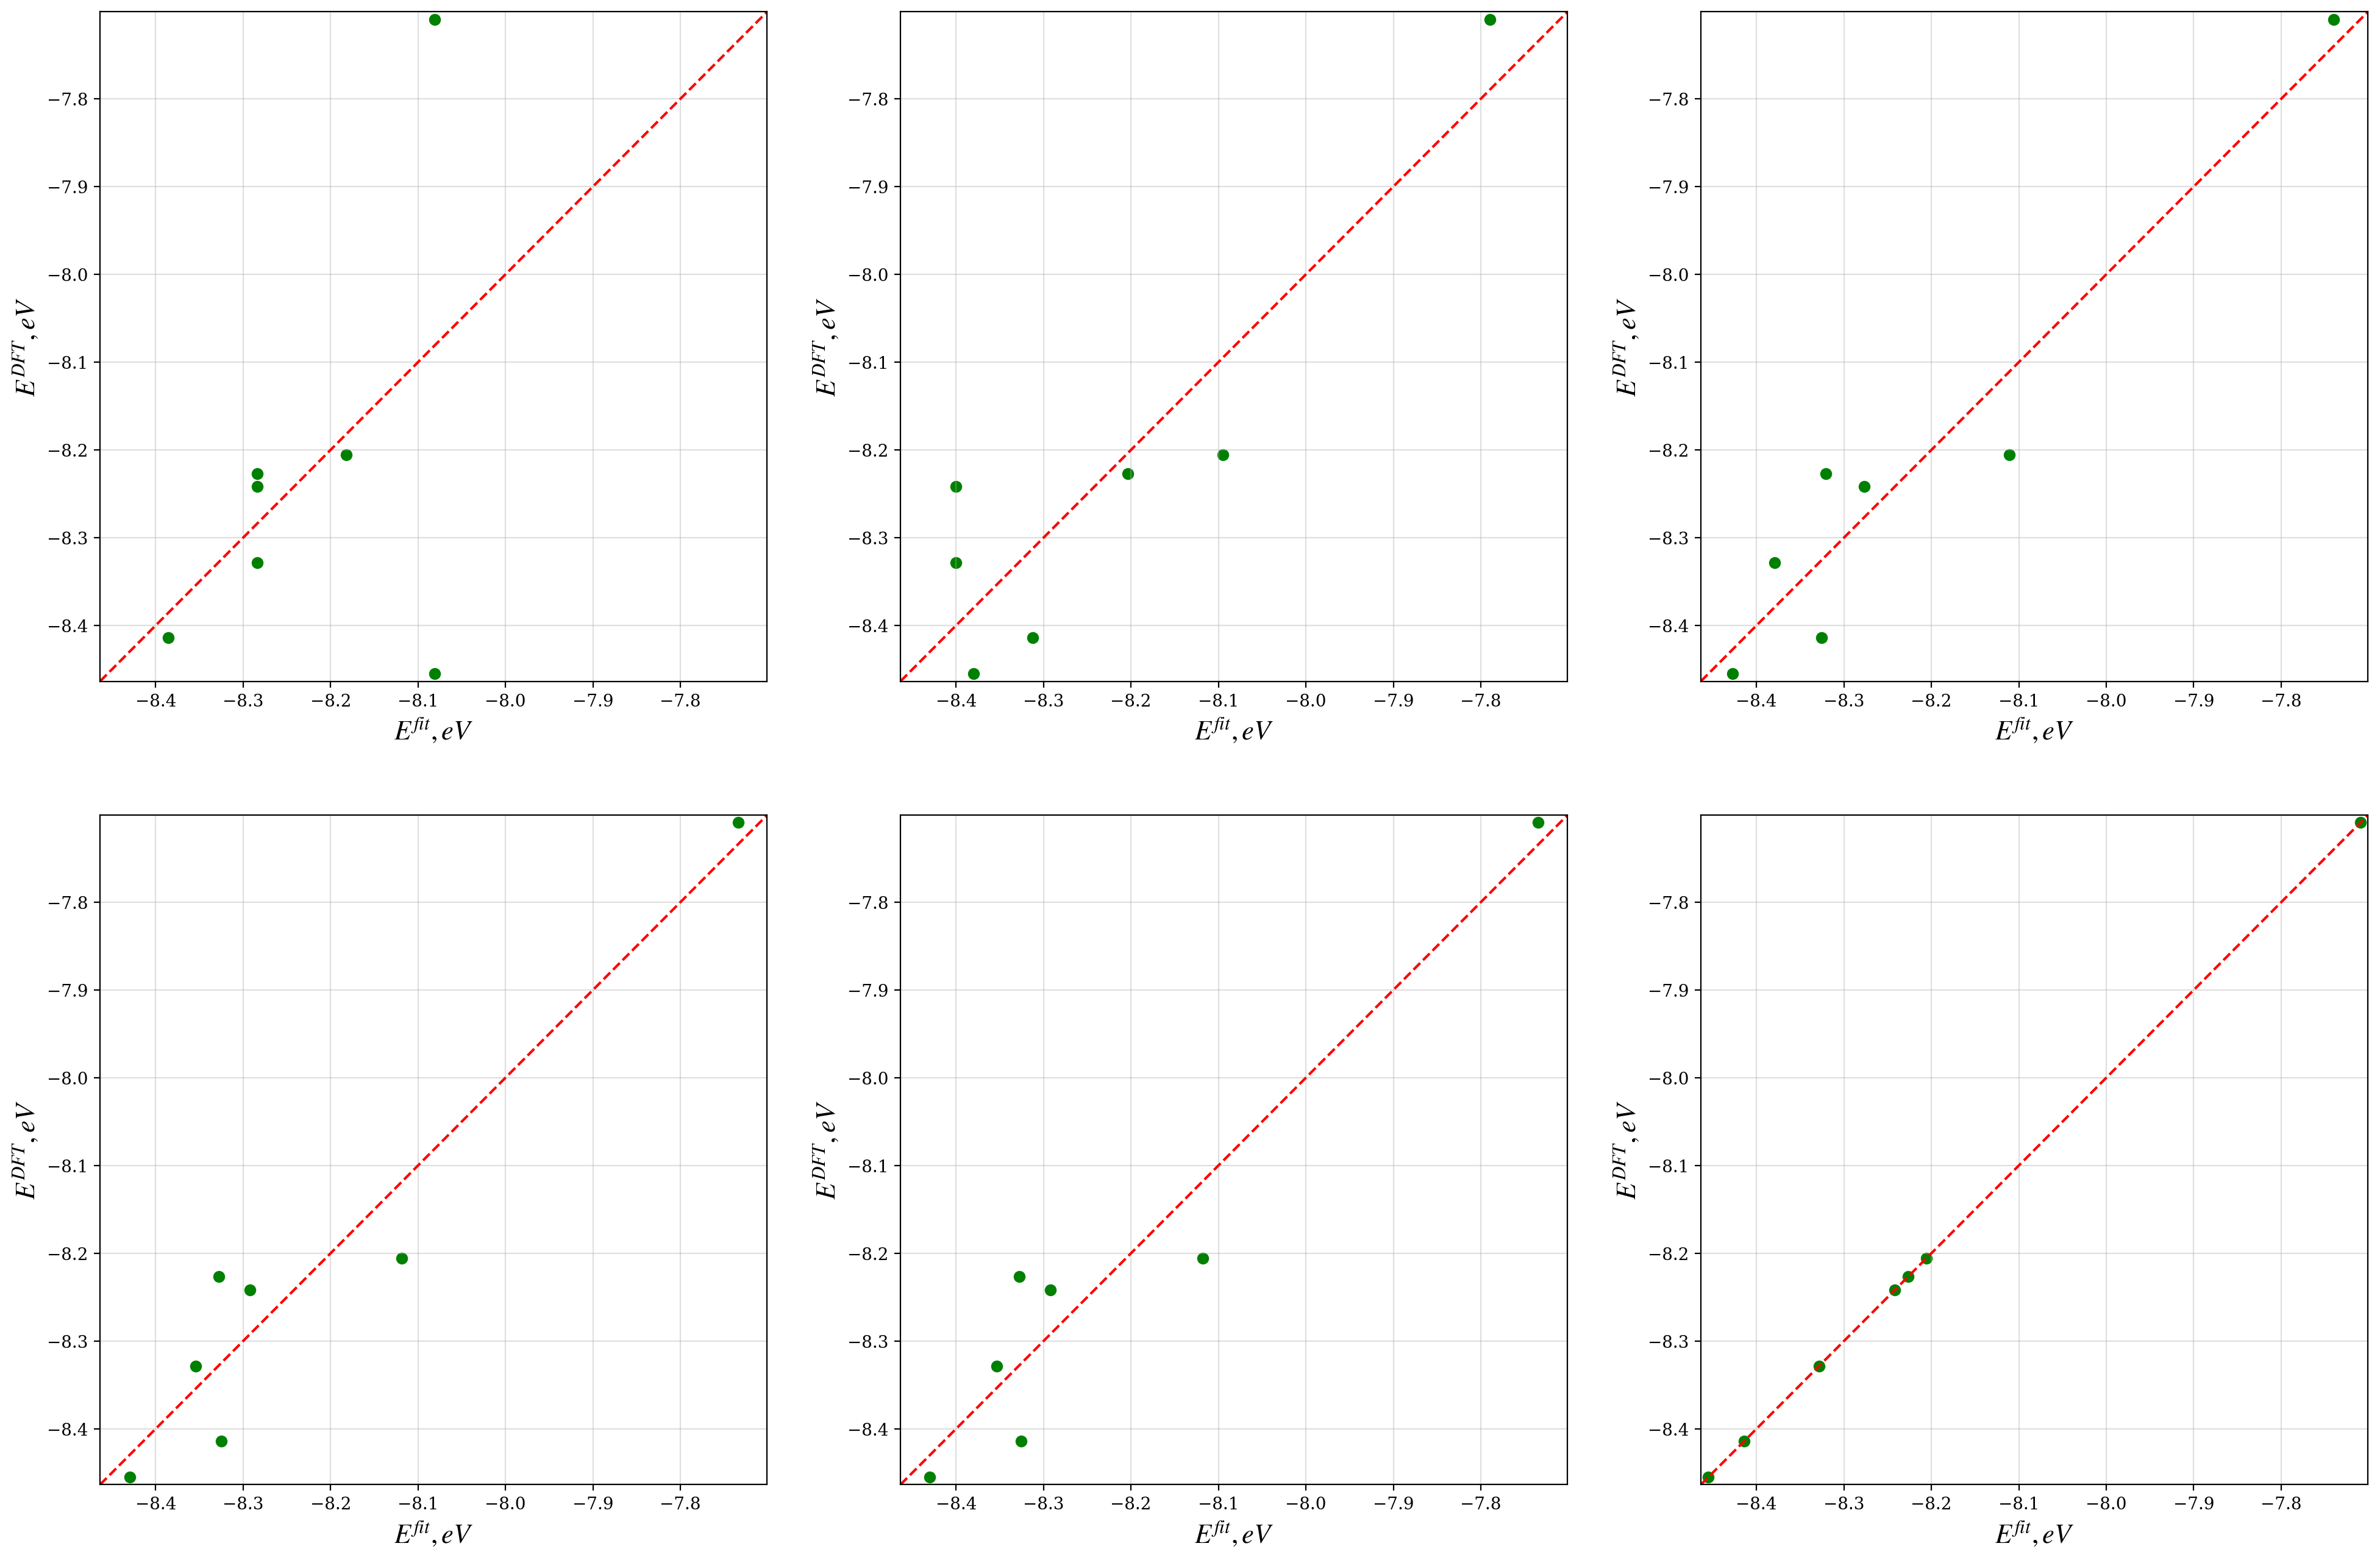

In [19]:
plt.figure(figsize = (24, 16), dpi=200)
for i in range(0, 6):
    plt.subplot(2, 3, i + 1)
    plot_fitting_energies(E_fitted_list[i], E_dft=energies)

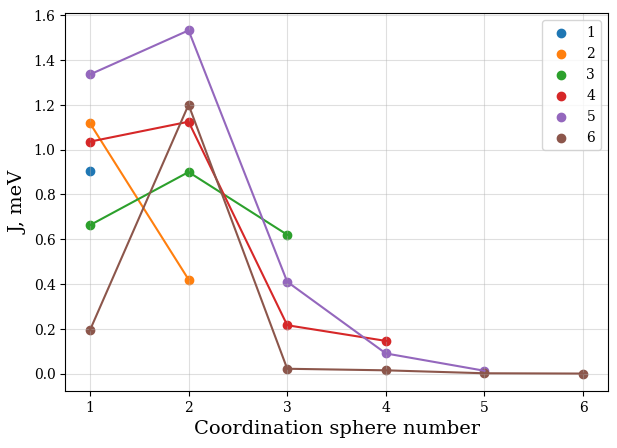

In [47]:
plt.figure(figsize=(7, 5), dpi=100)
j_vector= [[0.90327],
           [1.11820204, 0.42],
           [6.62746111e-01, 0.90, 0.62],
           [1.03563221, 1.1245639, 2.15986050e-01, 1.45943584e-01],
           [1.33563221, 1.53245639, 0.41, 0.09, 1.25943584e-02],
           [1.93563221e-01, 1.20045639, 2.15986050e-02, 1.45943584e-02, 1.45943584e-03, 1.45943584e-04]]
for y in j_vector:
    x = range(1, len(y) + 1)
    plt.scatter(x, y, label=len(x))
    plt.plot(x, y)
plt.xlabel('Coordination sphere number', fontsize = 14)
plt.ylabel('J, meV', fontsize = 14)
plt.grid(alpha=.4)
plt.legend()
plt.xticks(x);

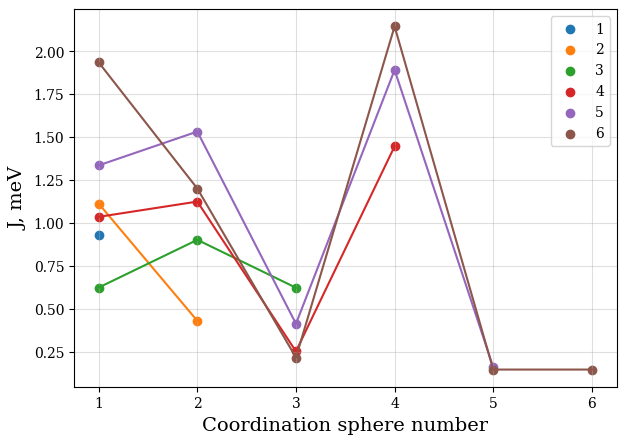

In [59]:
plt.figure(figsize=(7, 5), dpi=100)
j_vector= [[0.93],
           [1.112, 0.429],
           [0.623, 0.901, 0.622],
           [1.035, 1.124, 0.251, 1.446],
           [1.335, 1.532, 0.412, 1.891, 0.159],
           [1.935, 1.200, 0.215, 2.145, 0.145, 0.145]]
for y in j_vector:
    x = range(1, len(y) + 1)
    plt.scatter(x, y, label=len(x))
    plt.plot(x, y)
plt.xlabel('Coordination sphere number', fontsize = 14)
plt.ylabel('J, meV', fontsize = 14)
plt.grid(alpha=.4)
plt.legend()
plt.xticks(x);

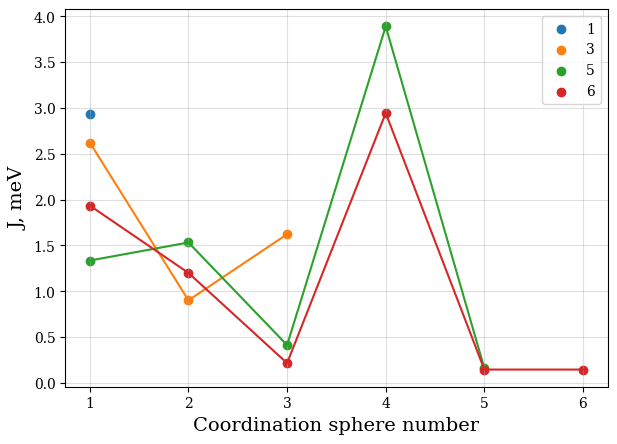

In [58]:
plt.figure(figsize=(7, 5), dpi=100)
j_vector= [[2.93],
           [2.623, 0.901, 1.622],
           [1.335, 1.532, 0.412, 3.891, 0.159],
           [1.935, 1.200, 0.215, 2.945, 0.145, 0.145]]
for y in j_vector:
    x = range(1, len(y) + 1)
    plt.scatter(x, y, label=len(x))
    plt.plot(x, y)
plt.xlabel('Coordination sphere number', fontsize = 14)
plt.ylabel('J, meV', fontsize = 14)
plt.grid(alpha=.4)
plt.legend()
plt.xticks(x);

In [98]:
def funct_m_t(T : float, T_c : float, b = 0.34) -> float:
    m = (1 - T / T_c) ** b
    return m


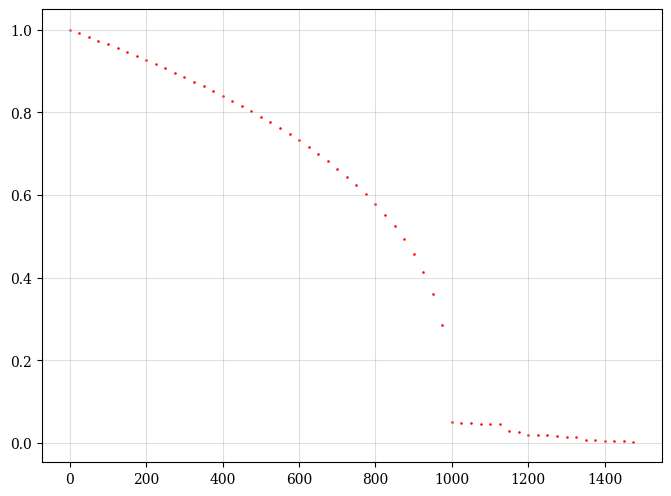

In [110]:
temp_range = range(0, 1500, 25)
T_c = 1000
magnetization = sorted([funct_m_t(T, T_c = T_c) if (T < T_c) else random.random() * 0.05 for T in temp_range],
                       reverse=True)
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(temp_range, magnetization, s=.7, color='r')
plt.grid(alpha=.4)